In [1]:
using Kinbiont
using CSV
using DataFrames
using Plots
using Statistics
# data from "Construction and Modeling of a Coculture Microplate for Real-Time Measurement of Microbial Interactions"
# strain annotation 
A0 = [1,11,21,31,41,51,13,33,53,7,17,37,47,57,38,48,58]
LP = [12,32,52,5,15,25,35,45,55,27,8,9,19,29,10,20,30]
LB = [4,14,24,34,44,54,16,36,56,18,28,39,49,59,40,50,60]

17-element Vector{Int64}:
  4
 14
 24
 34
 44
 54
 16
 36
 56
 18
 28
 39
 49
 59
 40
 50
 60

In [2]:
# load data
data = CSV.read("../data_examples/DATA_Gut_Microbiome_CoC.csv", DataFrame)
# convet time column from in elapsed time from the start in hours, the delta time in the data is 15 minutes

Row,Time,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,00:00:00,0.159,0.157,0.154,0.154,0.157,0.154,0.16,0.155,0.158,0.157,0.198,0.149,0.161,0.15,0.15,0.161,0.168,0.153,0.154,0.161,0.153,0.201,0.156,0.156,0.153,0.154,0.159,0.151,0.154,0.159,0.157,0.248,0.163,0.168,0.154,0.16,0.155,0.151,0.154,0.165,0.164,0.171,0.165,0.225,0.156,0.223,0.157,0.151,0.152,0.171,0.165,0.155,0.2,0.154,0.157,0.15,0.172,0.151,0.159,0.15
2,00:15:00,0.159,0.156,0.154,0.154,0.157,0.154,0.161,0.155,0.158,0.156,0.197,0.149,0.161,0.151,0.15,0.163,0.167,0.152,0.154,0.16,0.154,0.201,0.156,0.156,0.153,0.153,0.159,0.151,0.154,0.158,0.157,0.201,0.163,0.168,0.153,0.159,0.155,0.15,0.152,0.166,0.164,0.17,0.164,0.224,0.155,0.168,0.156,0.151,0.152,0.17,0.165,0.155,0.199,0.154,0.157,0.15,0.161,0.151,0.159,0.15
3,00:30:00,0.159,0.156,0.154,0.154,0.157,0.155,0.161,0.155,0.157,0.156,0.197,0.149,0.161,0.151,0.15,0.163,0.167,0.152,0.153,0.16,0.153,0.201,0.156,0.156,0.153,0.153,0.159,0.151,0.153,0.158,0.157,0.201,0.163,0.168,0.153,0.159,0.155,0.15,0.152,0.166,0.164,0.17,0.163,0.224,0.155,0.168,0.156,0.151,0.151,0.17,0.165,0.155,0.2,0.154,0.156,0.15,0.161,0.151,0.159,0.15
4,00:45:00,0.159,0.156,0.154,0.154,0.157,0.155,0.161,0.155,0.157,0.156,0.196,0.149,0.16,0.151,0.15,0.163,0.166,0.152,0.153,0.16,0.153,0.201,0.156,0.155,0.153,0.153,0.158,0.151,0.153,0.158,0.157,0.201,0.163,0.168,0.153,0.159,0.155,0.15,0.152,0.166,0.164,0.17,0.163,0.224,0.155,0.168,0.156,0.151,0.151,0.17,0.164,0.155,0.202,0.154,0.156,0.15,0.161,0.151,0.159,0.15
5,01:00:00,0.159,0.156,0.153,0.154,0.157,0.155,0.16,0.155,0.157,0.156,0.196,0.149,0.16,0.151,0.15,0.163,0.166,0.152,0.153,0.16,0.153,0.202,0.156,0.155,0.153,0.153,0.157,0.15,0.153,0.158,0.157,0.201,0.163,0.168,0.152,0.158,0.155,0.15,0.152,0.165,0.163,0.169,0.162,0.224,0.154,0.168,0.156,0.151,0.151,0.17,0.164,0.155,0.202,0.154,0.156,0.149,0.162,0.151,0.159,0.15
6,01:15:00,0.159,0.156,0.153,0.154,0.157,0.155,0.16,0.155,0.157,0.156,0.196,0.149,0.16,0.151,0.15,0.164,0.165,0.152,0.153,0.161,0.153,0.202,0.156,0.155,0.153,0.153,0.157,0.15,0.153,0.158,0.157,0.201,0.163,0.168,0.152,0.158,0.155,0.15,0.152,0.166,0.163,0.169,0.162,0.225,0.154,0.168,0.156,0.151,0.151,0.17,0.164,0.156,0.203,0.154,0.156,0.15,0.162,0.151,0.159,0.15
7,01:30:00,0.159,0.156,0.153,0.154,0.156,0.155,0.16,0.155,0.157,0.156,0.196,0.149,0.16,0.151,0.15,0.164,0.165,0.152,0.153,0.161,0.153,0.202,0.156,0.154,0.153,0.153,0.157,0.15,0.153,0.158,0.157,0.201,0.163,0.168,0.152,0.159,0.154,0.149,0.152,0.166,0.163,0.169,0.162,0.225,0.154,0.168,0.156,0.151,0.151,0.17,0.164,0.155,0.204,0.154,0.155,0.15,0.162,0.151,0.159,0.15
8,01:45:00,0.159,0.156,0.153,0.154,0.156,0.155,0.16,0.155,0.157,0.156,0.196,0.149,0.16,0.151,0.15,0.164,0.164,0.152,0.153,0.161,0.153,0.202,0.157,0.154,0.153,0.153,0.157,0.151,0.153,0.158,0.157,0.201,0.163,0.168,0.152,0.159,0.155,0.15,0.152,0.166,0.164,0.169,0.162,0.225,0.154,0.168,0.156,0.151,0.151,0.17,0.164,0.156,0.204,0.154,0.155,0.15,0.162,0.151,0.159,0.15
9,02:00:00,0.159,0.156,0.153,0.154,0.157,0.155,0.16,0.155,0.157,0.156,0.196,0.149,0.16,0.151,0.15,0.164,0.162,0.152,0.153,0.161,0.153,0.202,0.157,0.154,0.153,0.153,0.157,0.151,0.153,0.158,0.157,0.201,0.163,0.168,0.152,0.159,0.154,0.15,0.152,0.166,0.164,0.169,0.162,0.225,0.154,0.168,0.156,0.15,0.151,0.17,0.164,0.156,0.205,0.154,0.155,0.15,0.162,0.151,0.159,0.15


In [3]:
delta_time = 15/60
time_seq = 0:delta_time:(size(data,1)-1)*delta_time
time_seq = [ time_seq[i] for i in 1: length(time_seq)]
data[!,:Time] = time_seq 

385-element Vector{Float64}:
  0.0
  0.25
  0.5
  0.75
  1.0
  1.25
  1.5
  1.75
  2.0
  2.25
  2.5
  2.75
  3.0
  ⋮
 93.25
 93.5
 93.75
 94.0
 94.25
 94.5
 94.75
 95.0
 95.25
 95.5
 95.75
 96.0

In [4]:
index_tot = 2:1:size(data,2)
A0_index = A0.+1
LP_index = LP.+1
LB_index = LB.+1
blanS1_index = setdiff(index_tot, [A0_index; LP_index; LB_index])

9-element Vector{Int64}:
  3
  4
  7
 23
 24
 27
 43
 44
 47

In [5]:
### evaluating blank values by doing the mean of the blank columns
data_blanS1_values = Matrix(data[:,blanS1_index])
#blanS1_value = mean.(reduce(vcat,eachrow(data_blanS1_values)))
blanS1_value =  mean(data_blanS1_values,dims = (2))

385×1 Matrix{Float64}:
 0.17055555555555557
 0.164
 0.164
 0.164
 0.16377777777777774
 0.16377777777777774
 0.16377777777777774
 0.16388888888888886
 0.16388888888888886
 0.1641111111111111
 0.16366666666666665
 0.16388888888888886
 0.1638888888888889
 ⋮
 0.1668888888888889
 0.16699999999999998
 0.1671111111111111
 0.16733333333333333
 0.16733333333333333
 0.16744444444444442
 0.16755555555555557
 0.16755555555555557
 0.16766666666666666
 0.16777777777777778
 0.16788888888888887
 0.168

In [6]:
# Intializing the model for fitting with Kinbiont
model ="aHPM"
results_matrix = Kinbiont.initialize_df_results(model)

10-element Vector{String}:
 "label_exp"
 "well"
 "model"
 "gr"
 "exit_lag_rate"
 "N_max"
 "shape"
 "th_max_gr"
 "emp_max_gr"
 "loss"

In [7]:
p_guess = [0.2, 0.001, 1.00, 1.0]
ub_ahpm = [3.0, 1.0,3.00, 5.0]
lb_ahpm = [0.001, 0.0,0.2, 0.0]
# Fitting all AO data
# Not interacting A0
# AO, -
# [1,21,41];
A0 = [1,21,41].+1

3-element Vector{Int64}:
  2
 22
 42

In [8]:
data_A0 = data[:,A0] #.- blanS1_value

Row,A1,C1,E1
,Float64,Float64,Float64
1,0.159,0.153,0.164
2,0.159,0.154,0.164
3,0.159,0.153,0.164
4,0.159,0.153,0.164
5,0.159,0.153,0.163
6,0.159,0.153,0.163
7,0.159,0.153,0.163
8,0.159,0.153,0.164
9,0.159,0.153,0.164


In [9]:
# mean of the replicates
data_A0_mean = mean(Matrix(data_A0),dims=2)

385×1 Matrix{Float64}:
 0.15866666666666665
 0.159
 0.15866666666666665
 0.15866666666666665
 0.15833333333333333
 0.15833333333333333
 0.15833333333333333
 0.15866666666666665
 0.15866666666666665
 0.15866666666666665
 0.15866666666666665
 0.15866666666666665
 0.15866666666666665
 ⋮
 0.8256666666666668
 0.8263333333333334
 0.8266666666666667
 0.8273333333333334
 0.8273333333333334
 0.828
 0.8286666666666666
 0.8290000000000001
 0.8293333333333334
 0.8293333333333334
 0.8296666666666667
 0.8300000000000001

In [10]:
# Formatting data for Kinbiont
data_to_fit = permutedims( [time_seq data_A0_mean])

2×385 Matrix{Float64}:
 0.0       0.25   0.5       0.75      …  95.5       95.75      96.0
 0.158667  0.159  0.158667  0.158667      0.829333   0.829667   0.83

In [11]:
# Performing ODE fitting
results_ODE_fit = Kinbiont.fitting_one_well_ODE_constrained(
    data_to_fit, 
    "AO_NA",
    "CoC_DT",
    model,
    p_guess;
    lb = lb_ahpm,
    ub = ub_ahpm,
)
Plots.scatter(data_to_fit[1,:],data_to_fit[2,:], xlabel="Time [h]", ylabel="OD [Arb. Units]", label=["Data " nothing],color=:black,markersize =2 ,size = (300,300))
Plots.plot!(results_ODE_fit[4],results_ODE_fit[3], xlabel="Time [h]", ylabel="OD [Arb. Units]",label=["fit " nothing],color=:red,markersize =4 ,size = (300,300))
results_matrix = [results_matrix results_ODE_fit[2]]

10×2 Matrix{Any}:
 "label_exp"       "CoC_DT"
 "well"            "AO_NA"
 "model"           "aHPM"
 "gr"             1.22013
 "exit_lag_rate"  0.0120625
 "N_max"          0.794806
 "shape"          0.0716563
 "th_max_gr"      0.049274
 "emp_max_gr"     0.0736753
 "loss"           0.000423489

AO, LP
[11,31,51,7]; AO

In [12]:
A0 =  [11,31,51,7].+1

4-element Vector{Int64}:
 12
 32
 52
  8

In [13]:
data_A0 = data[:,A0] #.- blanS1_value

Row,B1,D1,F1,A7
,Float64,Float64,Float64,Float64
1,0.198,0.157,0.165,0.16
2,0.197,0.157,0.165,0.161
3,0.197,0.157,0.165,0.161
4,0.196,0.157,0.164,0.161
5,0.196,0.157,0.164,0.16
6,0.196,0.157,0.164,0.16
7,0.196,0.157,0.164,0.16
8,0.196,0.157,0.164,0.16
9,0.196,0.157,0.164,0.16


In [14]:
# mean of the replicates
data_A0_mean = mean(Matrix(data_A0),dims=2)

385×1 Matrix{Float64}:
 0.17
 0.17
 0.17
 0.1695
 0.16925
 0.16925
 0.16925
 0.16925
 0.16925
 0.1695
 0.16925
 0.1695
 0.1695
 ⋮
 1.879
 1.8805
 1.88025
 1.8815000000000002
 1.88175
 1.8820000000000001
 1.8824999999999998
 1.883
 1.88425
 1.88425
 1.8844999999999998
 1.8855

In [15]:
# Formatting data for Kinbiont
data_to_fit = permutedims( [time_seq data_A0_mean])

2×385 Matrix{Float64}:
 0.0   0.25  0.5   0.75    1.0      1.25     …  95.5      95.75    96.0
 0.17  0.17  0.17  0.1695  0.16925  0.16925      1.88425   1.8845   1.8855

In [16]:
# Performing ODE fitting
results_ODE_fit = Kinbiont.fitting_one_well_ODE_constrained(
    data_to_fit, 
    "AO_LP",
    "CoC_DT",
    model,
    p_guess;
    lb = lb_ahpm,
    ub = ub_ahpm,
)

("ODE", Any["CoC_DT", "AO_LP", "aHPM", 0.8612070466412881, 0.0012454175135224834, 1.8065825688010089, 0.1548527239603912, 0.10564669579199311, 0.13653071990591967, 0.0006405602972438187], [0.17, 0.17000178520788997, 0.17000730147258863, 0.17001680203515854, 0.1700305574201567, 0.17004885629107766, 0.17007200625849714, 0.17010033685422257, 0.17013419992549644, 0.17017396987276998  …  1.8057994853255046, 1.8058226084404594, 1.805845045105104, 1.8058668258006958, 1.8058879807792316, 1.8059085400634487, 1.8059285334468245, 1.8059479904935754, 1.8059669405386585, 1.8059854126877704], [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25  …  93.75, 94.0, 94.25, 94.5, 94.75, 95.0, 95.25, 95.5, 95.75, 96.0])

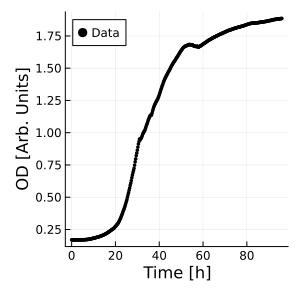

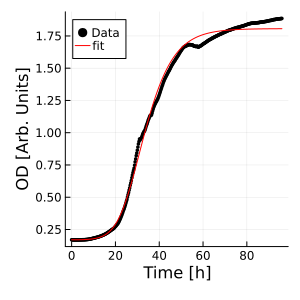

10×4 Matrix{Any}:
 "label_exp"       "CoC_DT"     "CoC_DT"    "CoC_DT"
 "well"            "AO_NA"      "AO_LP"     "AO_LP"
 "model"           "aHPM"       "aHPM"      "aHPM"
 "gr"             1.22013      0.861207    0.861207
 "exit_lag_rate"  0.0120625    0.00124542  0.00124542
 "N_max"          0.794806     1.80658     1.80658
 "shape"          0.0716563    0.154853    0.154853
 "th_max_gr"      0.049274     0.105647    0.105647
 "emp_max_gr"     0.0736753    0.136531    0.136531
 "loss"           0.000423489  0.00064056  0.00064056

In [18]:
display(Plots.scatter(data_to_fit[1,:],data_to_fit[2,:], xlabel="Time [h]", ylabel="OD [Arb. Units]", label=["Data " nothing],color=:black,markersize =2 ,size = (300,300)))
display(Plots.plot!(results_ODE_fit[4],results_ODE_fit[3], xlabel="Time [h]", ylabel="OD [Arb. Units]",label=["fit " nothing],color=:red,markersize =4 ,size = (300,300)))
results_matrix = [results_matrix results_ODE_fit[2]]

AO, LB
[13,33,53,17]; 

In [19]:
A0 = [13,33,53,17].+1

4-element Vector{Int64}:
 14
 34
 54
 18

In [20]:
data_A0 = data[:,A0] #.- blanS1_value

Row,B3,D3,F3,B7
,Float64,Float64,Float64,Float64
1,0.161,0.163,0.2,0.168
2,0.161,0.163,0.199,0.167
3,0.161,0.163,0.2,0.167
4,0.16,0.163,0.202,0.166
5,0.16,0.163,0.202,0.166
6,0.16,0.163,0.203,0.165
7,0.16,0.163,0.204,0.165
8,0.16,0.163,0.204,0.164
9,0.16,0.163,0.205,0.162


In [21]:
# mean of the replicates
data_A0_mean = mean(Matrix(data_A0),dims=2)

385×1 Matrix{Float64}:
 0.17300000000000001
 0.17250000000000001
 0.17275000000000001
 0.17275000000000001
 0.17275000000000001
 0.17275000000000001
 0.17300000000000001
 0.17275000000000001
 0.17250000000000001
 0.17275000000000001
 0.17275000000000001
 0.17275000000000001
 0.17275000000000001
 ⋮
 1.7934999999999999
 1.7935
 1.7945000000000002
 1.7945000000000002
 1.7965
 1.7965
 1.7975
 1.79825
 1.7987499999999998
 1.79975
 1.8002500000000001
 1.8010000000000002

In [22]:
# Formatting data for Kinbiont
data_to_fit = permutedims( [time_seq data_A0_mean])

2×385 Matrix{Float64}:
 0.0    0.25    0.5      0.75     1.0      …  95.5      95.75     96.0
 0.173  0.1725  0.17275  0.17275  0.17275      1.79975   1.80025   1.801

In [23]:
# Performing ODE fitting
results_ODE_fit = Kinbiont.fitting_one_well_ODE_constrained(
    data_to_fit, 
    "AO_LB",
    "CoC_DT",
    model,
    p_guess;
    lb = lb_ahpm,
    ub = ub_ahpm,
)
Plots.scatter(data_to_fit[1,:],data_to_fit[2,:], xlabel="Time [h]", ylabel="OD [Arb. Units]", label=["Data " nothing],color=:black,markersize =2 ,size = (300,300))
Plots.plot!(results_ODE_fit[4],results_ODE_fit[3], xlabel="Time [h]", ylabel="OD [Arb. Units]",label=["fit " nothing],color=:red,markersize =4 ,size = (300,300))
results_matrix = [results_matrix results_ODE_fit[2]]

10×5 Matrix{Any}:
 "label_exp"       "CoC_DT"     "CoC_DT"    "CoC_DT"    "CoC_DT"
 "well"            "AO_NA"      "AO_LP"     "AO_LP"     "AO_LB"
 "model"           "aHPM"       "aHPM"      "aHPM"      "aHPM"
 "gr"             1.22013      0.861207    0.861207    0.339889
 "exit_lag_rate"  0.0120625    0.00124542  0.00124542  0.00437501
 "N_max"          0.794806     1.80658     1.80658     1.73066
 "shape"          0.0716563    0.154853    0.154853    0.319161
 "th_max_gr"      0.049274     0.105647    0.105647    0.0780893
 "emp_max_gr"     0.0736753    0.136531    0.136531    0.120278
 "loss"           0.000423489  0.00064056  0.00064056  0.000773204

AO, AO
[37,47,57];

In [24]:
A0 =[37,47,57].+1

3-element Vector{Int64}:
 38
 48
 58

In [25]:
data_A0 = data[:,A0] #.- blanS1_value

Row,D7,E7,F7
,Float64,Float64,Float64
1,0.155,0.157,0.172
2,0.155,0.156,0.161
3,0.155,0.156,0.161
4,0.155,0.156,0.161
5,0.155,0.156,0.162
6,0.155,0.156,0.162
7,0.154,0.156,0.162
8,0.155,0.156,0.162
9,0.154,0.156,0.162


In [26]:
# mean of the replicates
data_A0_mean = mean(Matrix(data_A0),dims=2)

385×1 Matrix{Float64}:
 0.16133333333333333
 0.15733333333333333
 0.15733333333333333
 0.15733333333333333
 0.15766666666666665
 0.15766666666666665
 0.15733333333333333
 0.15766666666666665
 0.15733333333333333
 0.15733333333333333
 0.157
 0.157
 0.157
 ⋮
 0.7413333333333334
 0.7416666666666667
 0.7426666666666667
 0.7426666666666667
 0.7436666666666666
 0.7436666666666666
 0.7446666666666667
 0.745
 0.7453333333333333
 0.746
 0.7463333333333333
 0.7473333333333333

In [27]:
# Formatting data for Kinbiont
data_to_fit = permutedims( [time_seq data_A0_mean])

2×385 Matrix{Float64}:
 0.0       0.25      0.5       0.75      …  95.5    95.75      96.0
 0.161333  0.157333  0.157333  0.157333      0.746   0.746333   0.747333

In [28]:
# Performing ODE fitting
results_ODE_fit = Kinbiont.fitting_one_well_ODE_constrained(
    data_to_fit, 
    "AO_AO",
    "CoC_DT",
    model,
    p_guess;
    lb = lb_ahpm,
    ub = ub_ahpm,
)
Plots.scatter(data_to_fit[1,:],data_to_fit[2,:], xlabel="Time [h]", ylabel="OD [Arb. Units]", label=["Data " nothing],color=:black,markersize =2 ,size = (300,300))
Plots.plot!(results_ODE_fit[4],results_ODE_fit[3], xlabel="Time [h]", ylabel="OD [Arb. Units]",label=["fit " nothing],color=:red,markersize =4 ,size = (300,300))
results_matrix = [results_matrix results_ODE_fit[2]]

10×6 Matrix{Any}:
 "label_exp"       "CoC_DT"     "CoC_DT"   …   "CoC_DT"     "CoC_DT"
 "well"            "AO_NA"      "AO_LP"        "AO_LB"      "AO_AO"
 "model"           "aHPM"       "aHPM"         "aHPM"       "aHPM"
 "gr"             1.22013      0.861207       0.339889     1.3131
 "exit_lag_rate"  0.0120625    0.00124542     0.00437501   0.0422012
 "N_max"          0.794806     1.80658     …  1.73066      0.758391
 "shape"          0.0716563    0.154853       0.319161     0.0327909
 "th_max_gr"      0.049274     0.105647       0.0780893    0.0337578
 "emp_max_gr"     0.0736753    0.136531       0.120278     0.0633558
 "loss"           0.000423489  0.00064056     0.000773204  0.000926415

Creating feature Matrix

In [29]:
label_row = ["AO_NA","AO_LP","AO_LB","AO_AO"]
starting_0 = zeros(Int,4,3)
feature_matrix = hcat(label_row,starting_0)
feature_matrix[2,2] = 1 
feature_matrix[3,3] = 1 
feature_matrix[4,4] = 1 
feature_names = ["LP","LB","AO"]

3-element Vector{String}:
 "LP"
 "LB"
 "AO"

In [30]:
# DT regression of Nmax against the feature matrix
using Random

In [31]:
# Parameters of the decision tree
depth = -1  # No depth limit

-1

In [32]:
# Set random seed for reproducibility
seed = Random.seed!(1234)

TaskLocalRNG()

In [33]:
# Decision tree regression ON Nmax
dt = Kinbiont.downstream_decision_tree_regression(results_matrix,
        feature_matrix,
        6;  # Row to learn
        do_pruning=false,
        verbose=true,
        do_cross_validation=false,
        max_depth=depth, 
        seed=seed,
        min_samples_leaf =1,
        min_purity_increase= 0.001, 
        min_samples_split=2
    )

Feature 1 < 0.5 ?
├─ Feature 2 < 0.5 ?
    ├─ 0.7765983646178414 : 0/2
    └─ 1.7306606887242086 : 1/1
└─ 1.8065825688010089 : 1/1


(Decision Tree
Leaves: 3
Depth:  2, [0.09504223592220196, 0.15170581971320724, 0.0], [1.0, 1.0, 0.0], Any, Any["values" 1.0 … 2.0 3.0; "cluster" 0.794805890049619 … 1.7306606887242086 1.8065825688010089])

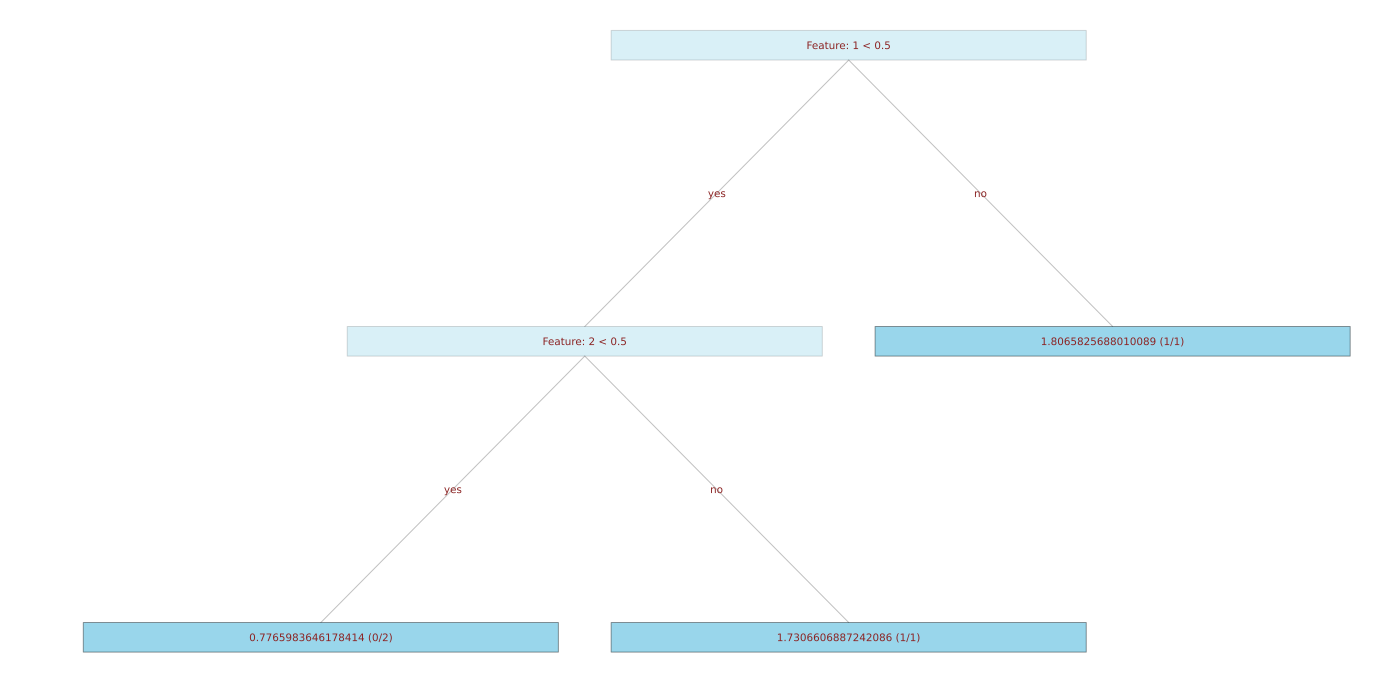

In [34]:
# Visualizing the decision tree
using DecisionTree
using AbstractTrees
using MLJDecisionTreeInterface
using TreeRecipe
wt = DecisionTree.wrap(dt[1])
p2 = Plots.plot(wt, 0.9, 0.2; size=(1400, 700), connect_labels=["yes", "no"])

In [35]:
# Decision tree regression exponential max growht rate
dt = Kinbiont.downstream_decision_tree_regression(results_matrix,
        feature_matrix,
        8;  # Row to learn
        do_pruning=false,
        verbose=true,
        do_cross_validation=false,
        max_depth=depth, 
        seed=seed,
        min_samples_leaf =1,
        min_purity_increase= 0.0001, 
        min_samples_split=2
    )

Feature 1 < 0.5 ?
├─ Feature 2 < 0.5 ?
    ├─ 0.0415159368226673 : 0/2
    └─ 0.07808934295391541 : 1/1
└─ 0.10564669579199311 : 1/1


(Decision Tree
Leaves: 3
Depth:  2, [0.0005058233435444814, 0.00022293567267353694, 0.0], [1.0, 1.0, 0.0], Any, Any["values" 1.0 … 2.0 3.0; "cluster" 0.049274045542590905 … 0.07808934295391541 0.10564669579199311])

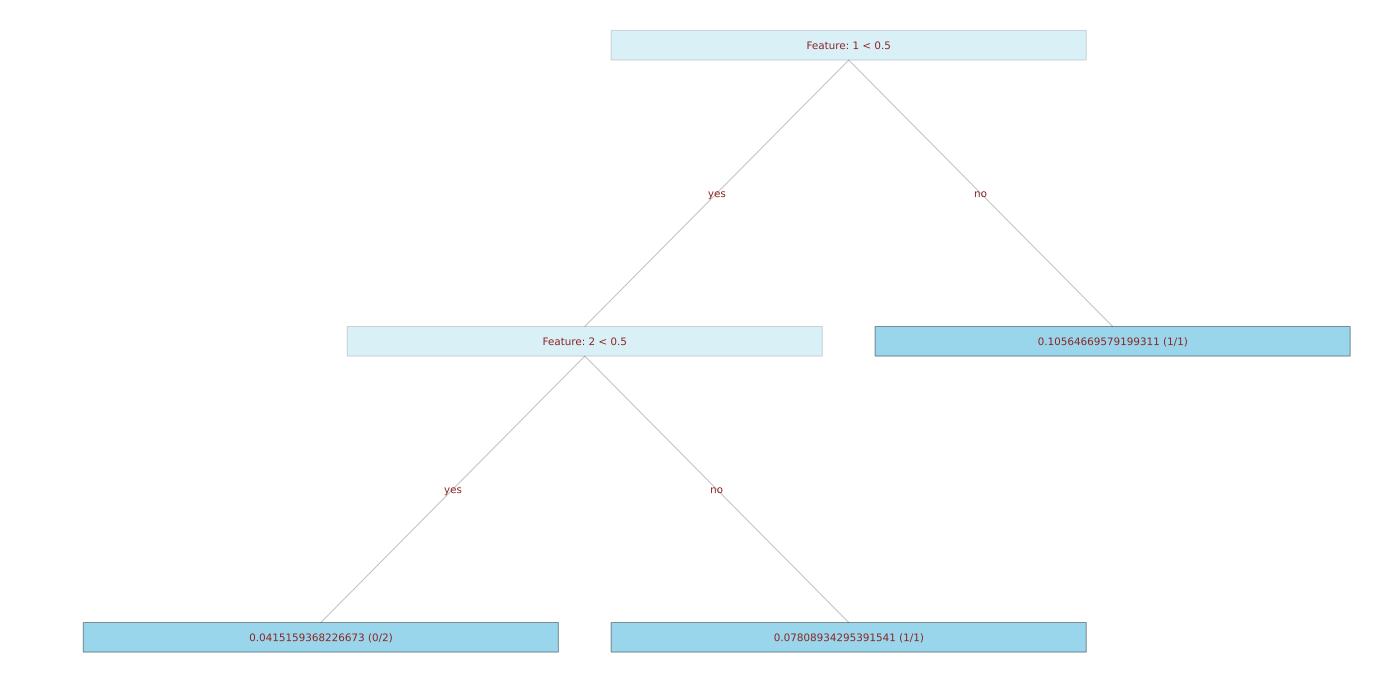

In [36]:
# Visualizing the decision tree
using DecisionTree
using AbstractTrees
using MLJDecisionTreeInterface
using TreeRecipe
wt = DecisionTree.wrap(dt[1])
p2 = Plots.plot(wt, 0.9, 0.2; size=(1400, 700), connect_labels=["yes", "no"])